In [69]:
import numpy as np
import pandas as pd

In [70]:
df = pd.read_csv('spam.csv')

In [71]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [72]:
df.shape

(5572, 5)

# Data Cleaning

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [74]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [75]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
df.sample(5)

,v1,v2
4109,ham,"Yo, you gonna still be in stock tomorrow/today..."
1352,ham,Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur S...
269,spam,Ringtone Club: Get the UK singles chart on you...
699,ham,K..u also dont msg or reply to his msg..
1148,ham,I'm not driving... Raining! Then i'll get caug...


In [77]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [78]:
df['target'] = np.where(df['target'] == 'ham', 0 , 1)

In [79]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
df.duplicated().sum()

403

In [81]:
df = df.drop_duplicates(keep = 'first')

In [82]:
df.duplicated().sum()

0

In [83]:
df.shape

(5169, 2)

# EDA

In [84]:
import matplotlib.pyplot as plt

In [85]:
df.groupby('target')['target'].count()

target
0    4516
1     653
Name: target, dtype: int64

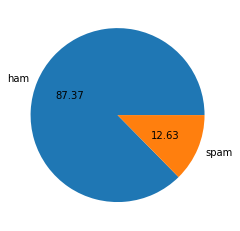

In [86]:
plt.pie(df.groupby('target')['target'].count(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [87]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yogesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
df['num_char'] = df['text'].apply(lambda x: len(x))

In [89]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [90]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [91]:
df['num_word'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [92]:
df.describe()

,target,num_char,num_sent,num_word
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.923776,1.962275,18.456375
std,0.332253,58.174846,1.433892,13.323322
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,1.000000,9.000000
50%,0.000000,60.000000,1.000000,15.000000
75%,0.000000,117.000000,2.000000,26.000000
max,1.000000,910.000000,38.000000,220.000000


In [93]:
df[df['target'] == 0].describe()

,target,num_char,num_sent,num_word
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.456820,1.815545,17.123339
std,0.0,56.356802,1.364098,13.491315
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,1.000000,8.000000
50%,0.0,52.000000,1.000000,13.000000
75%,0.0,90.000000,2.000000,22.000000
max,0.0,910.000000,38.000000,220.000000


In [94]:
df[df['target'] == 1].describe()

,target,num_char,num_sent,num_word
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.479326,2.977029,27.675345
std,0.0,30.014336,1.493676,7.011513
min,1.0,13.000000,1.000000,2.000000
25%,1.0,131.000000,2.000000,25.000000
50%,1.0,148.000000,3.000000,29.000000
75%,1.0,157.000000,4.000000,32.000000
max,1.0,223.000000,9.000000,46.000000


In [95]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

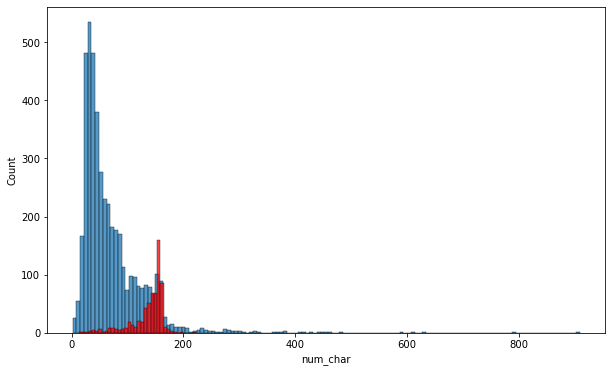

In [96]:
plt.figure(figsize = (10,6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'], color = 'red')

<AxesSubplot:xlabel='num_sent', ylabel='Count'>

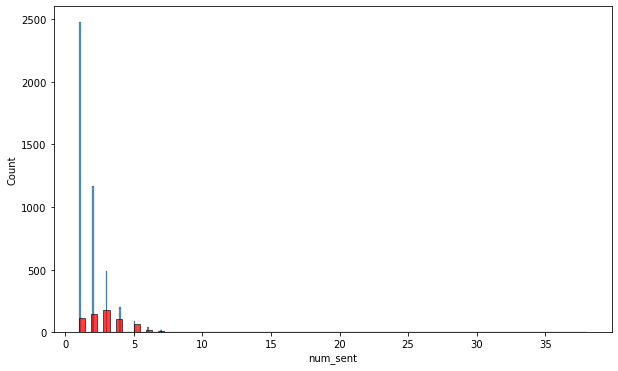

In [97]:
plt.figure(figsize = (10,6))
sns.histplot(df[df['target'] == 0]['num_sent'])
sns.histplot(df[df['target'] == 1]['num_sent'], color = 'red')

<AxesSubplot:xlabel='num_word', ylabel='Count'>

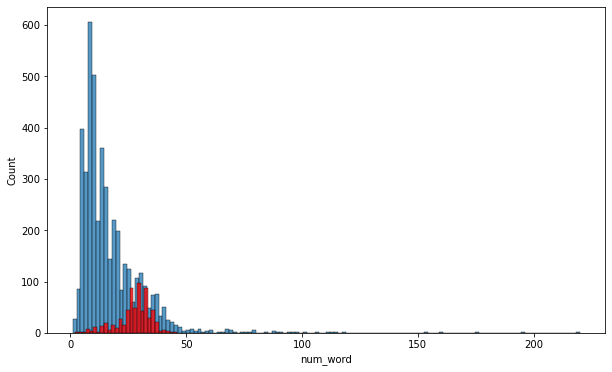

In [98]:
plt.figure(figsize = (10,6))
sns.histplot(df[df['target'] == 0]['num_word'])
sns.histplot(df[df['target'] == 1]['num_word'], color = 'red')

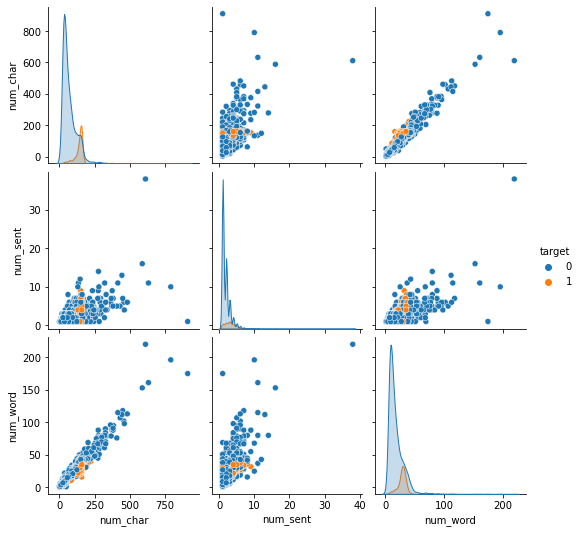

In [99]:
sns.pairplot(df, hue = 'target')

<AxesSubplot:>

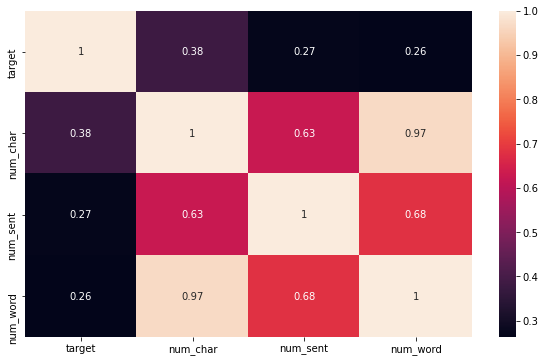

In [100]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True)

In [101]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yogesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [106]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [107]:
df['text'] = df['text'].apply(lambda x : transform_text(str(x)))

In [108]:
df.tail()

,target,text,num_char,num_sent,num_word
5567,1,2nd time tri 2 contact u pound prize 2 claim e...,160,4,35
5568,0,b go esplanad fr home,37,1,9
5569,0,piti mood suggest,57,2,15
5570,0,guy bitch act like interest buy someth els nex...,125,1,27
5571,0,rofl true name,26,2,7


In [109]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [110]:
spam_wc = wc.generate(df[df['target'] == 1]['text'].str.cat(sep = " "))

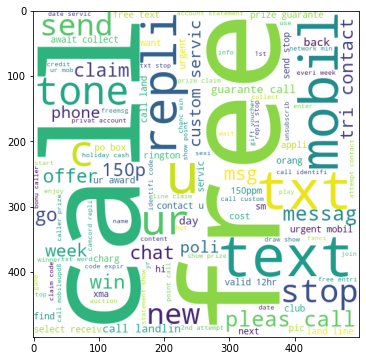

In [111]:
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)

In [112]:
ham_wc = wc.generate(df[df['target'] == 0]['text'].str.cat(sep = " "))

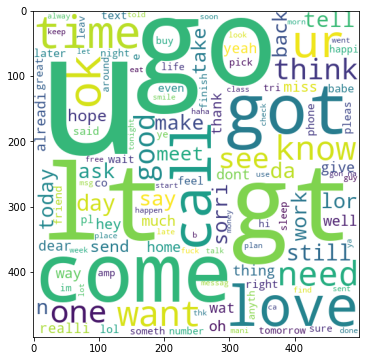

In [113]:
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)

In [114]:
spam_corpus = []

for sent in df[df['target'] == 1]['text'].tolist():
    for word in nltk.word_tokenize(sent):
        spam_corpus.append(word)

In [115]:
len(spam_corpus)

9941

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


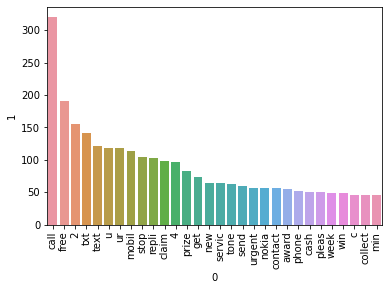

In [116]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [117]:
ham_corpus = []

for sent in df[df['target'] == 0]['text'].tolist():
    for word in nltk.word_tokenize(sent):
        ham_corpus.append(word)

In [118]:
len(ham_corpus)

35303

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


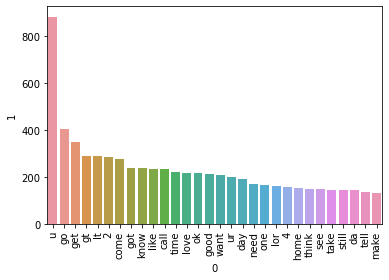

In [119]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [121]:
x = cv.fit_transform(df['text']).toarray()

In [122]:
x.shape

(5169, 6677)

In [123]:
y = df['target'].values

In [124]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [125]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify = y,test_size = 0.2, random_state = 0)

In [126]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [128]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [129]:
gnb.fit(xtrain, ytrain)
ypred1 = gnb.predict(xtest)
print(accuracy_score(ytest, ypred1))
print(confusion_matrix(ytest, ypred1))
print(precision_score(ytest, ypred1))

0.8665377176015474
[[782 121]
 [ 17 114]]
0.4851063829787234


In [130]:
mnb.fit(xtrain, ytrain)
ypred2 = mnb.predict(xtest)
print(accuracy_score(ytest, ypred2))
print(confusion_matrix(ytest, ypred2))
print(precision_score(ytest, ypred2))

0.971953578336557
[[885  18]
 [ 11 120]]
0.8695652173913043


In [131]:
bnb.fit(xtrain, ytrain)
ypred3 = bnb.predict(xtest)
print(accuracy_score(ytest, ypred3))
print(confusion_matrix(ytest, ypred3))
print(precision_score(ytest, ypred3))

0.9777562862669246
[[902   1]
 [ 22 109]]
0.990909090909091


In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [133]:
x = tfidf.fit_transform(df['text']).toarray()

In [134]:
x[3]

array([0., 0., 0., ..., 0., 0., 0.])

In [135]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify = y,test_size = 0.2, random_state = 0)

In [136]:
gnb.fit(xtrain, ytrain)
ypred1 = gnb.predict(xtest)
print(accuracy_score(ytest, ypred1))
print(confusion_matrix(ytest, ypred1))
print(precision_score(ytest, ypred1))

0.8636363636363636
[[781 122]
 [ 19 112]]
0.47863247863247865


In [137]:
mnb.fit(xtrain, ytrain)
ypred2 = mnb.predict(xtest)
print(accuracy_score(ytest, ypred2))
print(confusion_matrix(ytest, ypred2))
print(precision_score(ytest, ypred2))

0.9574468085106383
[[903   0]
 [ 44  87]]
1.0


In [138]:
bnb.fit(xtrain, ytrain)
ypred3 = bnb.predict(xtest)
print(accuracy_score(ytest, ypred3))
print(confusion_matrix(ytest, ypred3))
print(precision_score(ytest, ypred3))

0.9777562862669246
[[902   1]
 [ 22 109]]
0.990909090909091


In [139]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))